In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as snss
import missingno as msno
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

In [64]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type        to reduce memory usage.            """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                #    df[col] = df[col].astype(np.float32)
                #else:
                df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [65]:
df_train=pd.read_csv('train_final.csv')
df_test=pd.read_csv('test_final.csv')

In [66]:
print(df_train.shape)
target=df_train.Y
df_train.drop('Y',axis='columns',inplace=True)


(16383, 26)


In [67]:
frames=[df_train,df_test]
df=pd.concat(frames)
reduce_mem_usage(df)

Memory usage of dataframe is 6.50 MB
Memory usage after optimization is: 2.25 MB
Decreased by 65.4%


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.625000,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.617188,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.769531,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.093750,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.769531,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.769531,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.769531,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.539062,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.769531,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [68]:
ID=df.Id
df1=df.drop('Id',axis='columns')
test_ID=ID[16383:]
test_ID.shape

(16385,)

In [69]:
df1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.000000,3.276800e+04,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000
mean,42923.115509,1.042511,inf,118301.823212,1.045441,0.047760,116952.597015,170179.938049,1.043030,5.627777,...,25989.522491,118912.771729,183700.136932,1.048279,125916.370300,1.045715,1.043549,1.041229,2.228435e+04,1.043182
std,34174.395115,0.265731,inf,4551.658025,0.276843,0.310656,10875.728116,69509.942939,0.263166,95.839717,...,35928.434551,18961.612193,100488.195184,0.294797,31036.914405,0.263293,0.265218,0.240249,2.305925e+06,0.267341
min,-1.000000,1.000000,1.769531e+00,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,20298.000000,1.000000,1.769531e+00,118102.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,...,4566.000000,118394.000000,118363.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,35375.000000,1.000000,1.769531e+00,118300.000000,1.000000,0.000000,117961.000000,128696.000000,1.000000,0.000000,...,13545.000000,118921.000000,119006.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,74188.250000,1.000000,3.539062e+00,118386.000000,1.000000,0.000000,117961.000000,235280.000000,1.000000,1.000000,...,42034.000000,120535.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,312152.000000,17.000000,4.390400e+04,286791.000000,12.000000,24.000000,311178.000000,311867.000000,11.000000,10002.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,12.000000,7.000000,4.042886e+08,16.000000


In [70]:
df1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.000000,3.276800e+04,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000
mean,42923.115509,1.042511,inf,118301.823212,1.045441,0.047760,116952.597015,170179.938049,1.043030,5.627777,...,25989.522491,118912.771729,183700.136932,1.048279,125916.370300,1.045715,1.043549,1.041229,2.228435e+04,1.043182
std,34174.395115,0.265731,inf,4551.658025,0.276843,0.310656,10875.728116,69509.942939,0.263166,95.839717,...,35928.434551,18961.612193,100488.195184,0.294797,31036.914405,0.263293,0.265218,0.240249,2.305925e+06,0.267341
min,-1.000000,1.000000,1.769531e+00,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,20298.000000,1.000000,1.769531e+00,118102.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,...,4566.000000,118394.000000,118363.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,35375.000000,1.000000,1.769531e+00,118300.000000,1.000000,0.000000,117961.000000,128696.000000,1.000000,0.000000,...,13545.000000,118921.000000,119006.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,74188.250000,1.000000,3.539062e+00,118386.000000,1.000000,0.000000,117961.000000,235280.000000,1.000000,1.000000,...,42034.000000,120535.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,312152.000000,17.000000,4.390400e+04,286791.000000,12.000000,24.000000,311178.000000,311867.000000,11.000000,10002.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,12.000000,7.000000,4.042886e+08,16.000000


In [71]:
scaler=StandardScaler()
df2=np.array(df1)
scaler.fit(df2)
df3=scaler.transform(df2)
Norm_df=pd.DataFrame(df3)
Norm_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,...,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04,3.276800e+04
mean,6.155558e-17,1.563575e-15,7.063037e-17,3.724101e-16,9.499644e-16,-1.886463e-15,-7.276182e-16,1.816822e-16,5.923132e-16,9.453967e-16,...,6.578058e-17,-5.501021e-17,1.339112e-15,1.075466e-15,1.955579e-16,-2.183585e-15,-4.975048e-16,1.696331e-15,1.389909e-16,2.010890e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.256051e+00,-1.599797e-01,-3.491309e-02,-2.076700e+01,-1.641410e-01,-1.537414e-01,-1.035906e+01,-2.381090e+00,-1.635104e-01,-5.872162e-02,...,-7.226844e-01,-6.024831e+00,-1.796956e+00,-1.637722e-01,-2.589656e-01,-1.736316e-01,-1.642015e-01,-1.716130e-01,-9.663669e-03,-1.615279e-01
25%,-6.620589e-01,-1.599797e-01,-3.491309e-02,-4.390186e-02,-1.641410e-01,-1.537414e-01,9.272192e-02,-7.520469e-01,-1.635104e-01,-5.872162e-02,...,-5.962923e-01,-2.735947e-02,-6.502071e-01,-1.637722e-01,-2.462386e-01,-1.736316e-01,-1.642015e-01,-1.716130e-01,-9.663669e-03,-1.615279e-01
50%,-2.208739e-01,-1.599797e-01,-3.491309e-02,-4.005660e-04,-1.641410e-01,-1.537414e-01,9.272192e-02,-5.968149e-01,-1.635104e-01,-5.872162e-02,...,-3.463750e-01,4.339503e-04,-6.438082e-01,-1.637722e-01,-2.367659e-01,-1.736316e-01,-1.642015e-01,-1.716130e-01,-9.663236e-03,-1.615279e-01
75%,9.148841e-01,-1.599797e-01,-2.848613e-02,1.849394e-02,-1.641410e-01,-1.537414e-01,9.272192e-02,9.365718e-01,-1.635104e-01,-4.828737e-02,...,4.465745e-01,8.555459e-02,1.066996e+00,-1.637722e-01,-1.904333e-01,-1.736316e-01,-1.642015e-01,-1.716130e-01,-9.660200e-03,-1.615279e-01
max,7.878208e+00,6.005211e+01,1.594184e+02,3.701766e+01,3.957011e+01,7.710324e+01,1.785888e+01,2.038402e+00,3.783585e+01,1.043046e+02,...,7.952221e+00,8.853772e+00,1.242691e+00,5.750393e+01,5.991364e+00,2.641310e+01,4.131169e+01,2.480285e+01,1.753190e+02,5.594745e+01


In [72]:
Norm_df_train=Norm_df[:16383]
shuffle(Norm_df_train, random_state=1)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
8129,0.023787,-0.15998,-0.034913,-0.000401,-0.164141,-0.153741,0.092722,-0.752047,-0.163510,-0.058722,...,-0.651180,0.078962,1.066996,-0.163772,-0.258128,-0.173632,-0.164201,-0.171613,-0.009663,-0.161528
11743,-0.495499,-0.15998,-0.028486,-0.087623,-0.164141,-0.153741,0.087297,-0.398898,-0.163510,-0.058722,...,0.755972,0.528562,-0.649859,-0.163772,-0.227261,7.422576,-0.164201,-0.171613,-0.009632,-0.161528
11536,-0.426118,-0.15998,-0.034913,0.005531,-0.164141,-0.153741,0.092722,-0.607950,-0.163510,-0.058722,...,-0.271252,0.074110,1.066996,-0.163772,-0.168395,-0.173632,-0.164201,-0.171613,-0.009632,-0.161528
10017,-0.217304,-0.15998,-0.034913,-0.000401,-0.164141,-0.153741,0.092722,0.950325,-0.163510,-0.058722,...,-0.636567,0.073794,-0.647470,-0.163772,-0.195492,-0.173632,-0.164201,-0.171613,-0.009663,-0.161528
7369,-0.517533,-0.15998,-0.034913,0.009047,-0.164141,-0.153741,0.092722,-0.718497,3.636426,-0.048287,...,-0.242946,-0.004207,-0.654944,-0.163772,-0.253327,-0.173632,-0.164201,-0.171613,-0.009648,-0.161528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16127,-0.174376,-0.15998,-0.034913,-0.009848,-0.164141,-0.153741,0.119847,-0.591262,-0.163510,-0.016985,...,-0.295384,-0.015282,1.085665,-0.163772,-0.223008,-0.173632,-0.164201,-0.171613,-0.009664,-0.161528
5192,-0.579306,-0.15998,-0.034913,-0.016878,-0.164141,-0.153741,0.092722,-0.576127,-0.163510,-0.058722,...,-0.512235,-0.026885,-0.649311,-0.163772,-0.240536,-0.173632,-0.164201,-0.171613,-0.009664,-0.161528
12172,-1.031376,-0.15998,-0.028486,-0.016878,-0.164141,-0.153741,0.092722,-0.082061,-0.163510,-0.048287,...,-0.239272,0.045789,0.863675,-0.163772,-0.248397,-0.173632,-0.164201,-0.171613,-0.009656,-0.161528
235,-1.143304,-0.15998,-0.028486,0.018494,-0.164141,-0.153741,0.092722,1.216220,-0.163510,-0.027419,...,-0.233733,0.160760,-0.654944,-0.163772,-0.243210,-0.173632,-0.164201,-0.171613,-0.009662,-0.161528


In [85]:
Norm_df_test=Norm_df[16383:]
Norm_df_test

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
16383,-0.151874,-0.15998,-0.034913,0.066170,-0.164141,-0.153741,0.151661,-0.749299,-0.16351,-0.058722,...,-0.337023,-0.051250,-0.654944,-0.163772,-0.258772,-0.173632,-0.164201,-0.171613,-0.009664,-0.161528
16384,7.877535,-0.15998,-0.028486,-0.054887,-0.164141,-0.153741,0.092722,1.737031,-0.16351,-0.016985,...,-0.315953,0.004178,1.066996,-0.163772,-0.244724,-0.173632,-0.164201,-0.171613,-0.009661,-0.161528
16385,-0.527863,-0.15998,0.042253,-0.000401,-0.164141,-0.153741,0.092722,1.908390,-0.16351,-0.058722,...,-0.701948,0.014146,-1.781601,-0.163772,0.074546,-0.173632,-0.164201,-0.171613,-0.009658,-0.161528
16386,-1.119250,-0.15998,-0.034913,0.173385,-0.164141,-0.153741,0.193958,-0.750177,-0.16351,0.035187,...,-0.257113,1.298339,1.066996,-0.163772,-0.258128,-0.173632,-0.164201,-0.171613,-0.009629,-0.161528
16387,0.755018,-0.15998,-0.028486,-0.000401,-0.164141,-0.153741,0.092722,0.012604,-0.16351,-0.058722,...,-0.585743,-0.029153,-0.647470,-0.163772,-0.234575,-0.173632,-0.164201,-0.171613,-0.009664,-0.161528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,-1.227608,-0.15998,-0.034913,-0.000401,-0.164141,-0.153741,0.092722,2.025886,-0.16351,-0.058722,...,-0.587998,0.218457,-0.649600,-0.163772,-0.179543,-0.173632,-0.164201,-0.171613,-0.009645,-0.161528
32764,1.839969,-0.15998,-0.034913,0.005531,-0.164141,-0.153741,0.092722,-0.752047,-0.16351,-0.058722,...,0.180013,-0.031262,1.066996,-0.163772,-0.244724,-0.173632,-0.164201,-0.171613,-0.009662,-0.161528
32765,0.005059,-0.15998,-0.028486,-0.074660,-0.164141,-0.153741,0.092722,-0.745400,-0.16351,-0.058722,...,-0.667323,-0.053202,-0.654944,-0.163772,-0.243210,-0.173632,-0.164201,-0.171613,-0.009664,-0.161528
32766,-0.342458,-0.15998,-0.034913,0.018494,-0.164141,-0.153741,0.092722,-0.752047,-0.16351,-0.048287,...,-0.688616,-0.000146,1.066996,-0.163772,-0.244724,-0.173632,-0.164201,-0.171613,-0.009663,3.579070


In [86]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train1,X_test1,y_train1,y_test1= train_test_split(Norm_df_train,target,test_size=0.2)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

In [87]:
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(target== 0)))

Before OverSampling, counts of label '1': 15435
Before OverSampling, counts of label '0': 948 



In [88]:
smote = SMOTE(sampling_strategy=0.5,random_state=0)
X_sm, y_sm = smote.fit_resample(X_train1, y_train1)
X_sm_real, y_sm_real = smote.fit_resample(Norm_df_train, target)

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0)))


After OverSampling, the shape of train_X: (18508, 24)
After OverSampling, the shape of train_y: (18508,) 

After OverSampling, counts of label '1': 12339
After OverSampling, counts of label '0': 6169


In [89]:
from sklearn.model_selection import cross_val_score
dtrain = xgb.DMatrix(X_sm, label=y_sm)
dtest = xgb.DMatrix(X_test1, label=y_test1)
dvaltest=xgb.DMatrix(X_test1)
drealtrain = xgb.DMatrix(X_sm_real, label=y_sm_real)
drealtest = xgb.DMatrix(Norm_df_test)
from sklearn.metrics import accuracy_score

In [90]:
params = {
    'max_depth':7,
    'min_child_weight': 2,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'lambda':5,
    'alpha' :0,
}
NUM_BOOST_ROUNDS=1000

In [91]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.79960
[1]	Test-auc:0.80776
[2]	Test-auc:0.81734
[3]	Test-auc:0.81841
[4]	Test-auc:0.82497
[5]	Test-auc:0.81979
[6]	Test-auc:0.82772
[7]	Test-auc:0.83795
[8]	Test-auc:0.83762
[9]	Test-auc:0.83896
[10]	Test-auc:0.84099
[11]	Test-auc:0.84641
[12]	Test-auc:0.84595
[13]	Test-auc:0.85094
[14]	Test-auc:0.85072
[15]	Test-auc:0.85537
[16]	Test-auc:0.85767
[17]	Test-auc:0.85868
[18]	Test-auc:0.86046
[19]	Test-auc:0.86062
[20]	Test-auc:0.86185
[21]	Test-auc:0.86363
[22]	Test-auc:0.86253
[23]	Test-auc:0.86253
[24]	Test-auc:0.86178
[25]	Test-auc:0.86206
[26]	Test-auc:0.86370
[27]	Test-auc:0.86710
[28]	Test-auc:0.86679
[29]	Test-auc:0.86915
[30]	Test-auc:0.87156
[31]	Test-auc:0.87458
[32]	Test-auc:0.87520
[33]	Test-auc:0.87499
[34]	Test-auc:0.87597
[35]	Test-auc:0.87570
[36]	Test-auc:0.87678
[37]	Test-auc:0.87780
[38]	Test-auc:0.87780
[39]	Test-auc:0.87718
[40]	Test-auc:0.87614
[41]	Test-auc:0.87737
[42]	Test-auc:0.87676
[43]	Test-auc:0.87810
[44]	Test-auc:0.87855
[45]	Test-auc:0.8788

In [92]:
y_valnewpred=xbg_model1.predict(dvaltest)
print('auc score-',metrics.roc_auc_score(y_test1, y_valnewpred))

auc score- 0.8973474952531872


In [93]:
xbg_model3 = xgb.train(
   params,
drealtrain,
    num_boost_round=98)

True     15942
False      443
Name: 0, dtype: int64

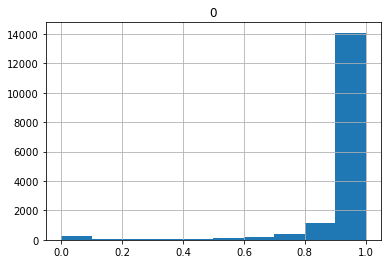

In [94]:
y_newpred=xbg_model3.predict(drealtest)
h=pd.DataFrame(y_newpred)
h.hist()
d=h>0.5
d[0].value_counts()


In [95]:
output2 = pd.DataFrame({'id':test_ID,'Y':y_newpred})
output2.to_csv('USING STANDARD SCALAR WITH SMOTE.csv', index=False)